# Predicting Diabetes
Gonna implement this project in 4 different algorithms and then fianlly will decide which is the best algorithm for this problem. 

### Aim of the project .

Machine learning algorithms can be used to predict the risk of developing diabetes,and in this project we will aim to successfully predict whether a person has diabetes or not using logistic regression,decision tree,random forest classifier and naive Bayes algorithms.

## Loading of data

In [1]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display # allows to use display() for dataframes
import matplotlib.pyplot as plt
import sklearn

# pretty display for notebooks
%matplotlib inline

# loading the data
data = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')


# Display records
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. Pregnancies: This attribute represents the number of times the person has been pregnant. It ranges from 0 to 17 pregnancies.

2. Glucose: This attribute represents the glucose level in the person's blood. Glucose levels are measured in mg/dL and range from 0 to 199 mg/dL.

3. BloodPressure: This attribute represents the person's blood pressure measurement. Blood pressure is measured in mm Hg and consists of two numbers, the systolic and diastolic blood pressure. The systolic blood pressure ranges from 0 to 122 mm Hg, while the diastolic blood pressure ranges from 0 to 99 mm Hg.

4. SkinThickness: This attribute represents the thickness of the person's skin in mm. It is measured using a caliper and ranges from 0 to 99 mm.

5. Insulin: This attribute represents the insulin level in the person's blood. Insulin is a hormone that regulates blood sugar levels. Insulin levels are measured in μU/mL and range from 0 to 846 μU/mL.

6. BMI: This attribute represents the person's body mass index. BMI is a measure of body fat based on height and weight. It is calculated as weight in kilograms divided by height in meters squared and ranges from 0 to 67.1 kg/m².

7. DiabetesPedigreeFunction: This attribute represents the person's diabetes pedigree function, which provides an estimate of the likelihood of the person developing diabetes based on family history. It is a dimensionless value and ranges from 0.078 to 2.42.

8. Age: This attribute represents the person's age in years and ranges from 21 to 81 years.

9. Outcome: This attribute represents the final result, where 1 indicates that the person has diabetes and 0 indicates that the person does not have diabetes.

## Preparing data

In [2]:
# Find missing values

print('Number of missing values in skin thickness column :' ,(data["SkinThickness"]==0).sum())
print('Number of missing values in Insulin column :' ,(data["Insulin"]==0).sum())

Number of missing values in skin thickness column : 227
Number of missing values in Insulin column : 374


In [3]:
# replace 0 values in both columns with the mean values of the column
data.loc[data["SkinThickness"] == 0, "SkinThickness"] =  data["SkinThickness"].mean()
data.loc[data["Insulin"] == 0, "Insulin"] =  data["Insulin"].mean()

/tmp/ipykernel_13/1275211713.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.536458333333332' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["SkinThickness"] == 0, "SkinThickness"] =  data["SkinThickness"].mean()
/tmp/ipykernel_13/1275211713.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '79.79947916666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["Insulin"] == 0, "Insulin"] =  data["Insulin"].mean()


In [4]:
# count the number of 0 values left should be 0

print((data["SkinThickness"] == 0).sum())
print((data["Insulin"] == 0).sum())

0
0


In [5]:
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


In [6]:
#Total number of records
n_records = len(data.index)

#Number of records where outcome = 1
n_1 = data[data.Outcome == 1].shape[0]

#Number of records where outcome = 0
n_0 = data[data.Outcome == 0].shape[0]

#Percentage of individuals whose Outcome is 1
n1_perc = (n_1/n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Number of persons diagonised with diabetes : {}".format(n_1))
print("Number of persons not having diabetes : {}".format(n_0))
print("Percentage of people who are Diabetic : {}%".format(n1_perc))

Total number of records: 768
Number of persons diagonised with diabetes : 268
Number of persons not having diabetes : 500
Percentage of people who are Diabetic : 34.89583333333333%


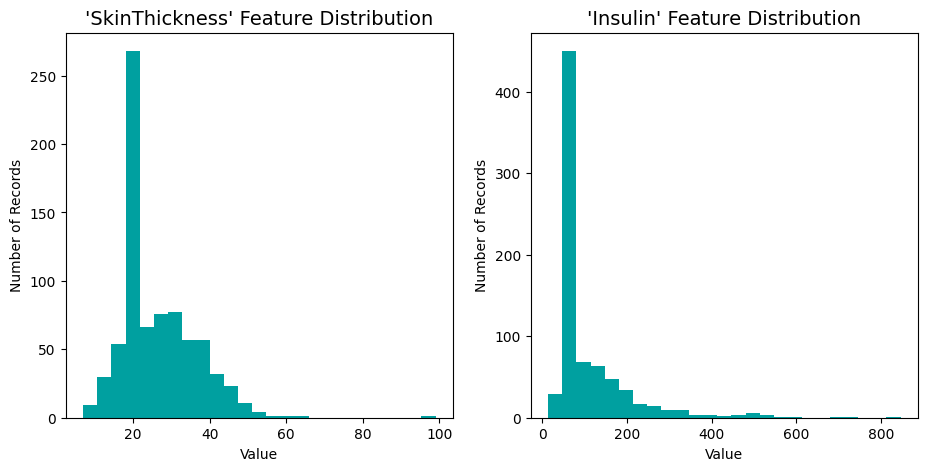

In [7]:
# Split the data into features and target label

outcome_r = data['Outcome'] #target label
features_r = data.drop('Outcome', axis = 1) #other features

# Visualize skewed continuous features of original data
fig = plt.figure(figsize = (11,5));

# Skewed feature plotting
for i, feature in enumerate(['SkinThickness','Insulin']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(data[feature], bins = 25, color = '#00A0A0')
    ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")

In [8]:
def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = plt.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['SkinThickness','Insulin']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

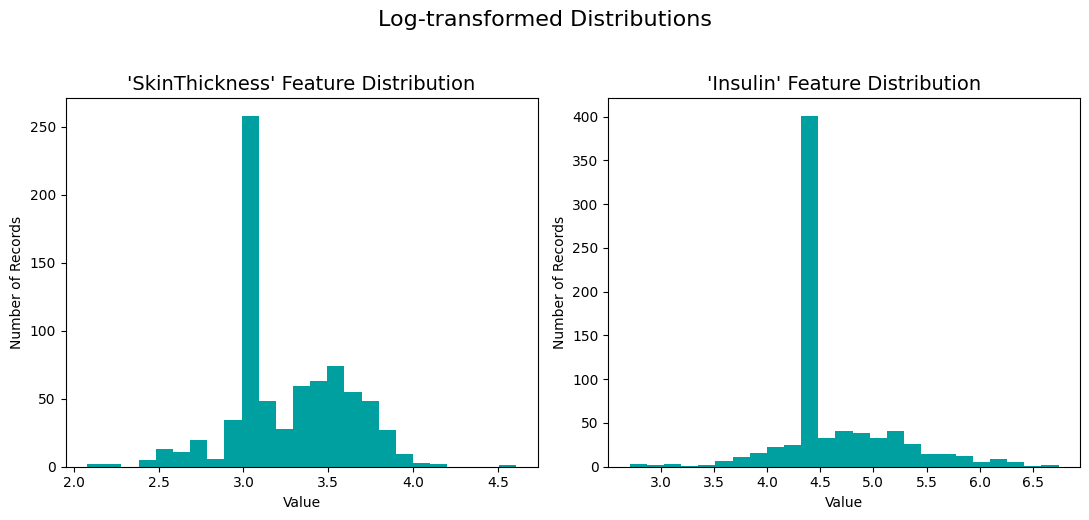

In [9]:
# Log-transform the skewed features
skewed = ['SkinThickness','Insulin']
features_log_transformed = pd.DataFrame(data = features_r)
features_log_transformed[skewed] = features_r[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
distribution(features_log_transformed, transformed = True)

In [10]:
#Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Insulin','SkinThickness', 'DiabetesPedigreeFunction']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))
features_final = features_log_minmax_transform

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0.595502,0.417468,33.6,0.234415,50
1,1,85,66,0.523317,0.417468,26.6,0.116567,31
2,8,183,64,0.392087,0.417468,23.3,0.253629,32
3,1,89,66,0.434968,0.457607,28.1,0.038002,21
4,0,137,40,0.595502,0.600411,43.1,0.943638,33


## Training and Testing dataset


In [11]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    outcome_r, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 614 samples.
Testing set has 154 samples.
